# 08_named_entity_recognition.ipynb

**NER per Poem and Corpus**
Extracts PERSON and LOC entities using spaCy Spanish model, counts frequencies, plots top entities.

In [3]:
from pathlib import Path

def setup_project_paths():
    current_dir = Path().cwd()
    base_path = current_dir.parent if current_dir.name == 'codigo' else current_dir
    tei_dir = base_path / 'corpus' / 'tei'
    csv_dir = base_path / 'resultados' / 'computational-analysis' / 'corpus_summary' / 'csv'
    ext_dir = base_path / 'resultados' / 'computational-analysis' / 'extensions'
    csv_dir.mkdir(parents=True, exist_ok=True)
    ext_dir.mkdir(parents=True, exist_ok=True)
    return tei_dir, csv_dir, ext_dir

TEI_DIR, CSV_DIR, EXT_DIR = setup_project_paths()

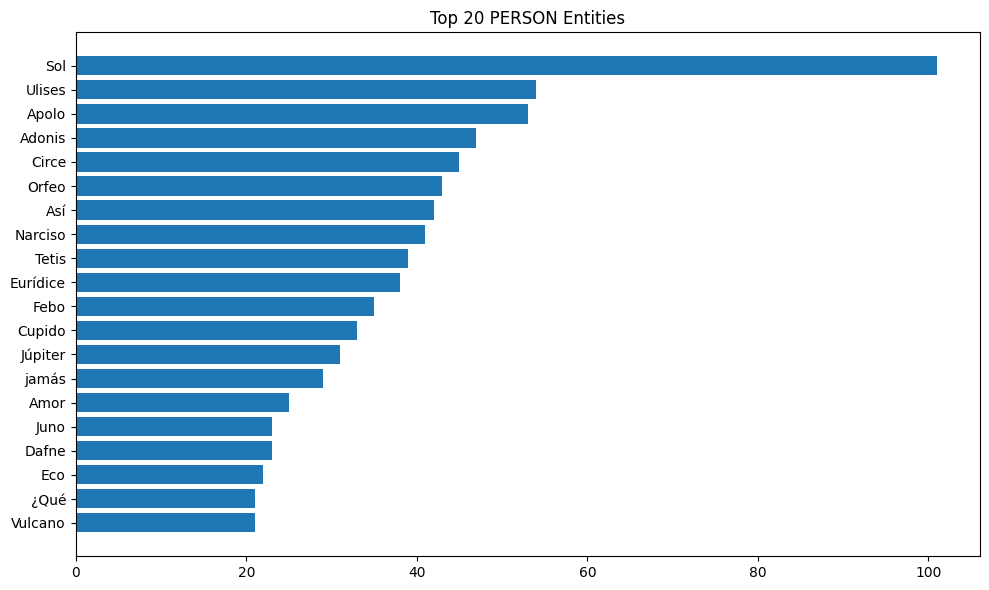

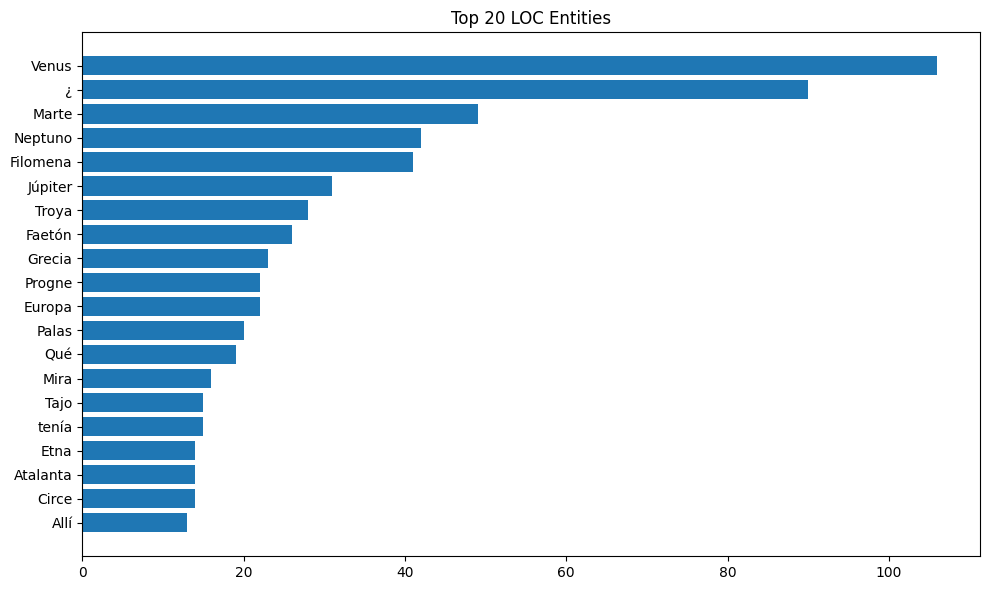

In [4]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

# Load spaCy Spanish model
nlp = spacy.load('es_core_news_sm')

# Load texts
texts_df = pd.read_csv(CSV_DIR / 'raw_texts.csv')
persons = []
locs = []
records = []

# Process each poem
for _, row in texts_df.iterrows():
    fname = row['filename']
    doc = nlp(row['text'])
    pers = [ent.text for ent in doc.ents if ent.label_ == 'PER']
    loc = [ent.text for ent in doc.ents if ent.label_ in ('LOC','GPE')]
    records.append({
        'filename': fname,
        'person_count': len(pers),
        'loc_count': len(loc)
    })
    persons.extend(pers)
    locs.extend(loc)

# Save per-poem counts
pd.DataFrame(records).to_csv(EXT_DIR / 'ner_counts_per_poem.csv', index=False)

# Corpus-level frequencies
person_freq = pd.Series(persons).value_counts().reset_index()
person_freq.columns = ['entity', 'count']
loc_freq = pd.Series(locs).value_counts().reset_index()
loc_freq.columns = ['entity', 'count']

person_freq.to_csv(EXT_DIR / 'person_freq.csv', index=False)
loc_freq.to_csv(EXT_DIR / 'loc_freq.csv', index=False)

# Plot top 20 persons
plt.figure(figsize=(10,6))
plt.barh(person_freq['entity'].head(20)[::-1], person_freq['count'].head(20)[::-1])
plt.title('Top 20 PERSON Entities')
plt.tight_layout()
plt.savefig(EXT_DIR / 'top20_persons.png')
plt.show()

# Plot top 20 locations
plt.figure(figsize=(10,6))
plt.barh(loc_freq['entity'].head(20)[::-1], loc_freq['count'].head(20)[::-1])
plt.title('Top 20 LOC Entities')
plt.tight_layout()
plt.savefig(EXT_DIR / 'top20_locations.png')
plt.show()